PREPROCESAMIENTO DE DATOS

In [1]:
import pandas as pd
import numpy as np
import collections as cols
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Cargar el archivo CSV
file_path = 'databases/Base de datos HACQ.csv'
df = pd.read_csv(file_path)
print(df)
print(df.columns)

        var001       var002      var003  month  year     __sexo  __hgt  \
0       168692  U0004802741   4/11/2023      4  2023  Masculino    NaN   
1       214287  U0005119913   11/5/2023     11  2023  Masculino    NaN   
2       113755  U0004427396   8/13/2022      8  2022  Masculino    NaN   
3       202840  U0005038530   9/16/2023      9  2023  Masculino    NaN   
4        31544  U0003873327    7/6/2021      7  2021  Masculino    NaN   
...        ...          ...         ...    ...   ...        ...    ...   
103156  137998  U0004600580  11/26/2022     11  2022   Femenino    NaN   
103157   50108  U0003998985  10/21/2021     10  2021   Femenino  101.0   
103158   98326  U0004327713    6/3/2022      6  2022  Masculino    NaN   
103159  187747  U0004932755    7/1/2023      7  2023  Masculino    NaN   
103160  108243  U0004392833   7/20/2022      7  2022   Femenino    NaN   

        __temperatura  __pulso  __pas  __pad  __fres  __sat02  __peso  \
0           36.299999     81.0    NaN 

In [2]:
# Paso 1: Eliminar las columnas no útiles
#df_cleaned = df.drop(columns=['var001', 'var002', 'var003', 'month', 'year'])
df_cleaned = df[['month','__sexo','__temperatura','__pulso','__pas','__pad','__sat02','__categorizacion']].copy()

print(df_cleaned)

        month     __sexo  __temperatura  __pulso  __pas  __pad  __sat02  \
0           4  Masculino      36.299999     81.0    NaN    NaN     99.0   
1          11  Masculino      36.400002    105.0  185.0   96.0     99.0   
2           8  Masculino      36.200001    101.0    NaN    NaN     99.0   
3           9  Masculino      36.400002    106.0  125.0   99.0     99.0   
4           7  Masculino      36.500000     57.0  118.0   66.0    100.0   
...       ...        ...            ...      ...    ...    ...      ...   
103156     11   Femenino      36.299999     74.0  152.0   97.0     98.0   
103157     10   Femenino      36.500000     60.0  143.0   78.0     98.0   
103158      6  Masculino      36.299999     77.0  163.0   77.0    100.0   
103159      7  Masculino      36.400002    112.0  143.0   83.0     98.0   
103160      7   Femenino      36.000000     82.0  167.0   90.0     98.0   

       __categorizacion  
0                    C4  
1                    C4  
2                    

In [3]:
# Paso 2: Convertir las columnas categóricas a valores numéricos usando Label Encoding
label_encoders = {}
for column in ['__sexo','__categorizacion']:
    le = LabelEncoder()
    df_cleaned[column] = le.fit_transform(df_cleaned[column].astype(str))
    label_encoders[column] = le
df_cleaned['__categorizacion'] = df_cleaned['__categorizacion'] + 1

print(df_cleaned)

        month  __sexo  __temperatura  __pulso  __pas  __pad  __sat02  \
0           4       1      36.299999     81.0    NaN    NaN     99.0   
1          11       1      36.400002    105.0  185.0   96.0     99.0   
2           8       1      36.200001    101.0    NaN    NaN     99.0   
3           9       1      36.400002    106.0  125.0   99.0     99.0   
4           7       1      36.500000     57.0  118.0   66.0    100.0   
...       ...     ...            ...      ...    ...    ...      ...   
103156     11       0      36.299999     74.0  152.0   97.0     98.0   
103157     10       0      36.500000     60.0  143.0   78.0     98.0   
103158      6       1      36.299999     77.0  163.0   77.0    100.0   
103159      7       1      36.400002    112.0  143.0   83.0     98.0   
103160      7       0      36.000000     82.0  167.0   90.0     98.0   

        __categorizacion  
0                      4  
1                      4  
2                      3  
3                      4  


Counter({4: 40098, 5: 37404, 3: 19058, 2: 6316, 1: 285})
[4, 3, 5, 2, 1]
[40098, 19058, 37404, 6316, 285]


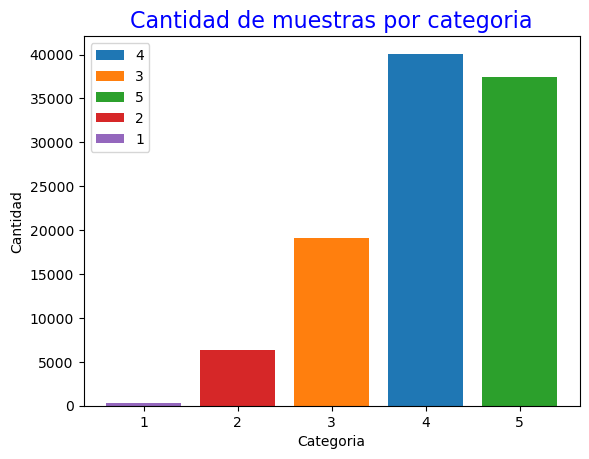

In [4]:
import matplotlib.pyplot as plt
from pylab import rcParams

count_cat = cols.Counter(df_cleaned["__categorizacion"])
print(count_cat)

#Obtenemos los elementos por cada genero y su cantidad de muestras
category = list(count_cat.keys())
print(category)
cat_size = list(count_cat.values())
print(cat_size)


#Fuente
font = {'family': 'sans-serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 16,
        }

plt.title("Cantidad de muestras por categoria", fontdict=font)
plt.xlabel("Categoria")
plt.ylabel("Cantidad")

for i in range(len(cat_size)):
  plt.bar(category[i], cat_size[i], label=category[i])

plt.legend()
plt.show()


In [5]:
# ordenar la base de datos en referencia a categorización
sorted_df = df_cleaned.sort_values('__categorizacion')
print(sorted_df)

       month  __sexo  __temperatura  __pulso  __pas  __pad  __sat02  \
72839     10       1      38.200001    168.0    NaN    NaN     97.0   
96445      7       1      36.200001    110.0  102.0   56.0      NaN   
92040     12       1      36.299999     80.0  140.0   88.0     98.0   
90352      7       0      36.400002     76.0  121.0   66.0    100.0   
79267      2       1      36.599998    111.0  100.0   59.0     79.0   
...      ...     ...            ...      ...    ...    ...      ...   
69053      3       0      36.000000    110.0    NaN    NaN     98.0   
69054      5       0      36.200001    135.0    NaN    NaN     99.0   
33805      5       1      36.500000     83.0  125.0   79.0     99.0   
69086      7       1      36.500000    129.0    NaN    NaN     99.0   
76005     10       1      36.599998    114.0    NaN    NaN     96.0   

       __categorizacion  
72839                 1  
96445                 1  
92040                 1  
90352                 1  
79267            

In [6]:
# Separamos el conjunto de datos C1, C2 y C3, C4, C5
# 1: 285 | 2: 6316 | 3: 19058 | 4: 40098 | 5: 37404
#c1 = sorted_df[0:285]
#c2 = sorted_df[285:6601]
#c3 = sorted_df[6601:25659]
#c4 = sorted_df[25659:65757]
#c5 = sorted_df[65757:len(sorted_df['__categorizacion'])]
first_group = sorted_df[0:6601]
second_group = sorted_df[6601:len(sorted_df['__categorizacion'])]

print("--- FIRST GROUP ---")
print(first_group)
print("--- SECOND GROUP ---")
print(second_group)

--- FIRST GROUP ---
        month  __sexo  __temperatura  __pulso  __pas  __pad  __sat02  \
72839      10       1      38.200001    168.0    NaN    NaN     97.0   
96445       7       1      36.200001    110.0  102.0   56.0      NaN   
92040      12       1      36.299999     80.0  140.0   88.0     98.0   
90352       7       0      36.400002     76.0  121.0   66.0    100.0   
79267       2       1      36.599998    111.0  100.0   59.0     79.0   
...       ...     ...            ...      ...    ...    ...      ...   
41970       6       0      36.799999     79.0  111.0   78.0     98.0   
49693       8       0      36.299999    101.0  109.0   43.0    100.0   
99509       9       1      36.000000     81.0  153.0   92.0     99.0   
102851     10       1      36.000000    106.0  110.0   86.0     98.0   
49776       5       0      36.400002    102.0  163.0  103.0     99.0   

        __categorizacion  
72839                  1  
96445                  1  
92040                  1  
90352  

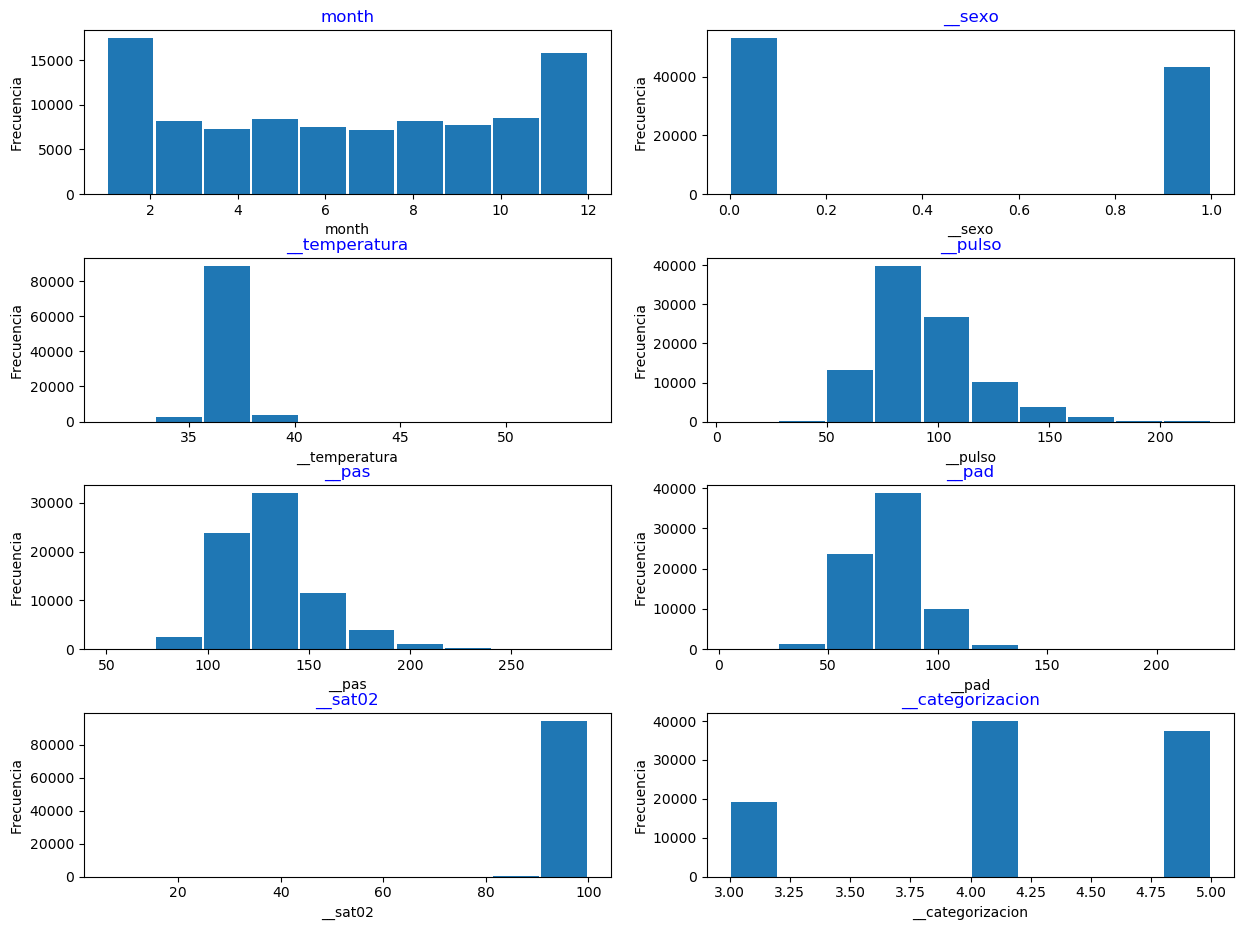

In [7]:
# Histogramas
font2 = {'family': 'sans-serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 14,
        }

pos = 1
for col_name in second_group.columns[0:8]:
  plt.subplot(4, 2, pos)
  plt.hist(second_group[col_name], bins=10, rwidth=0.95)
  plt.title('Histograma de' + col_name, fontdict=font2)
  plt.xlabel(col_name)
  plt.ylabel('Frecuencia')
  plt.title(col_name)

  pos = pos + 1

plt.tight_layout(pad=1.8, w_pad=0.5, h_pad=0, rect=(0,0,2,2))

plt.show()

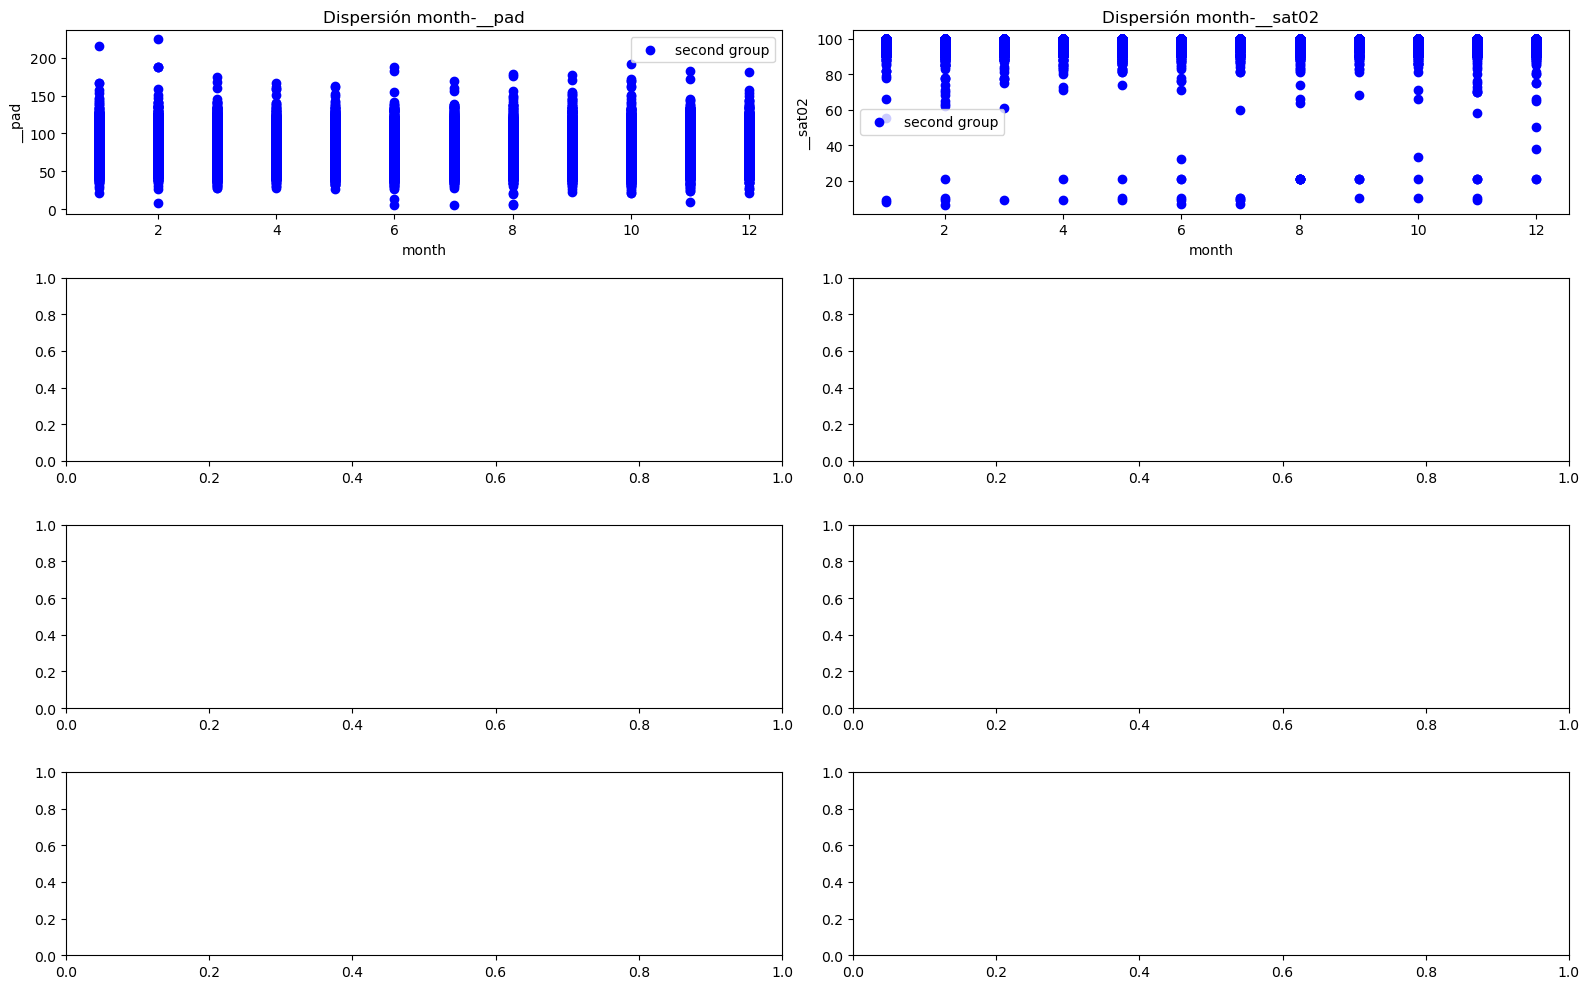

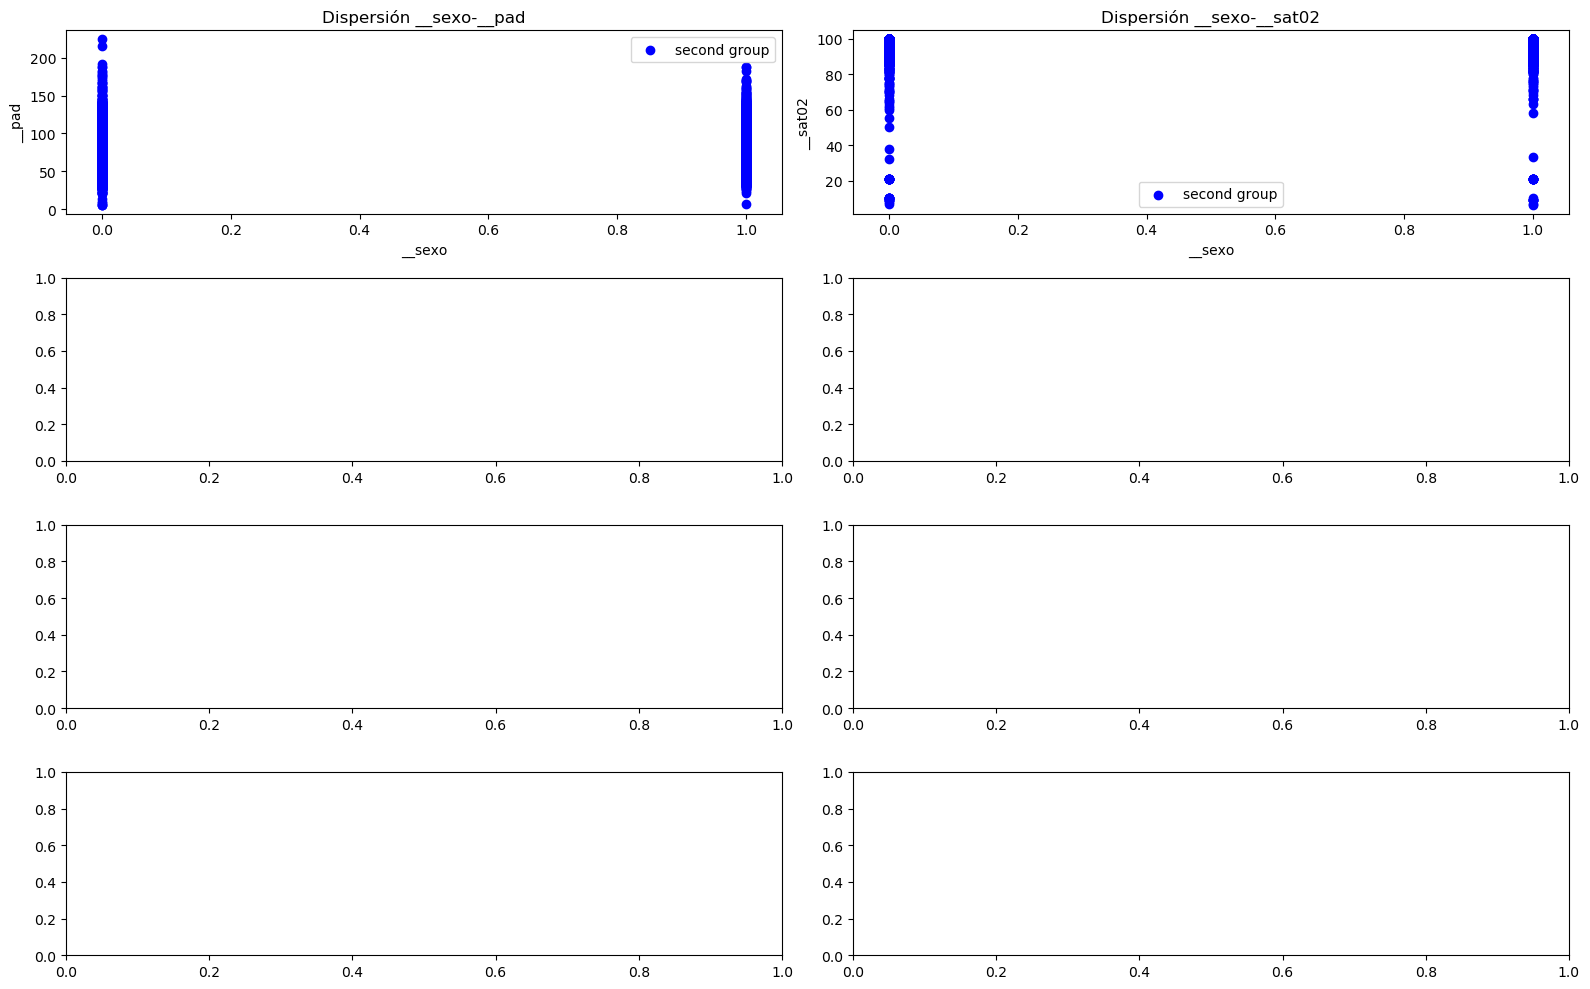

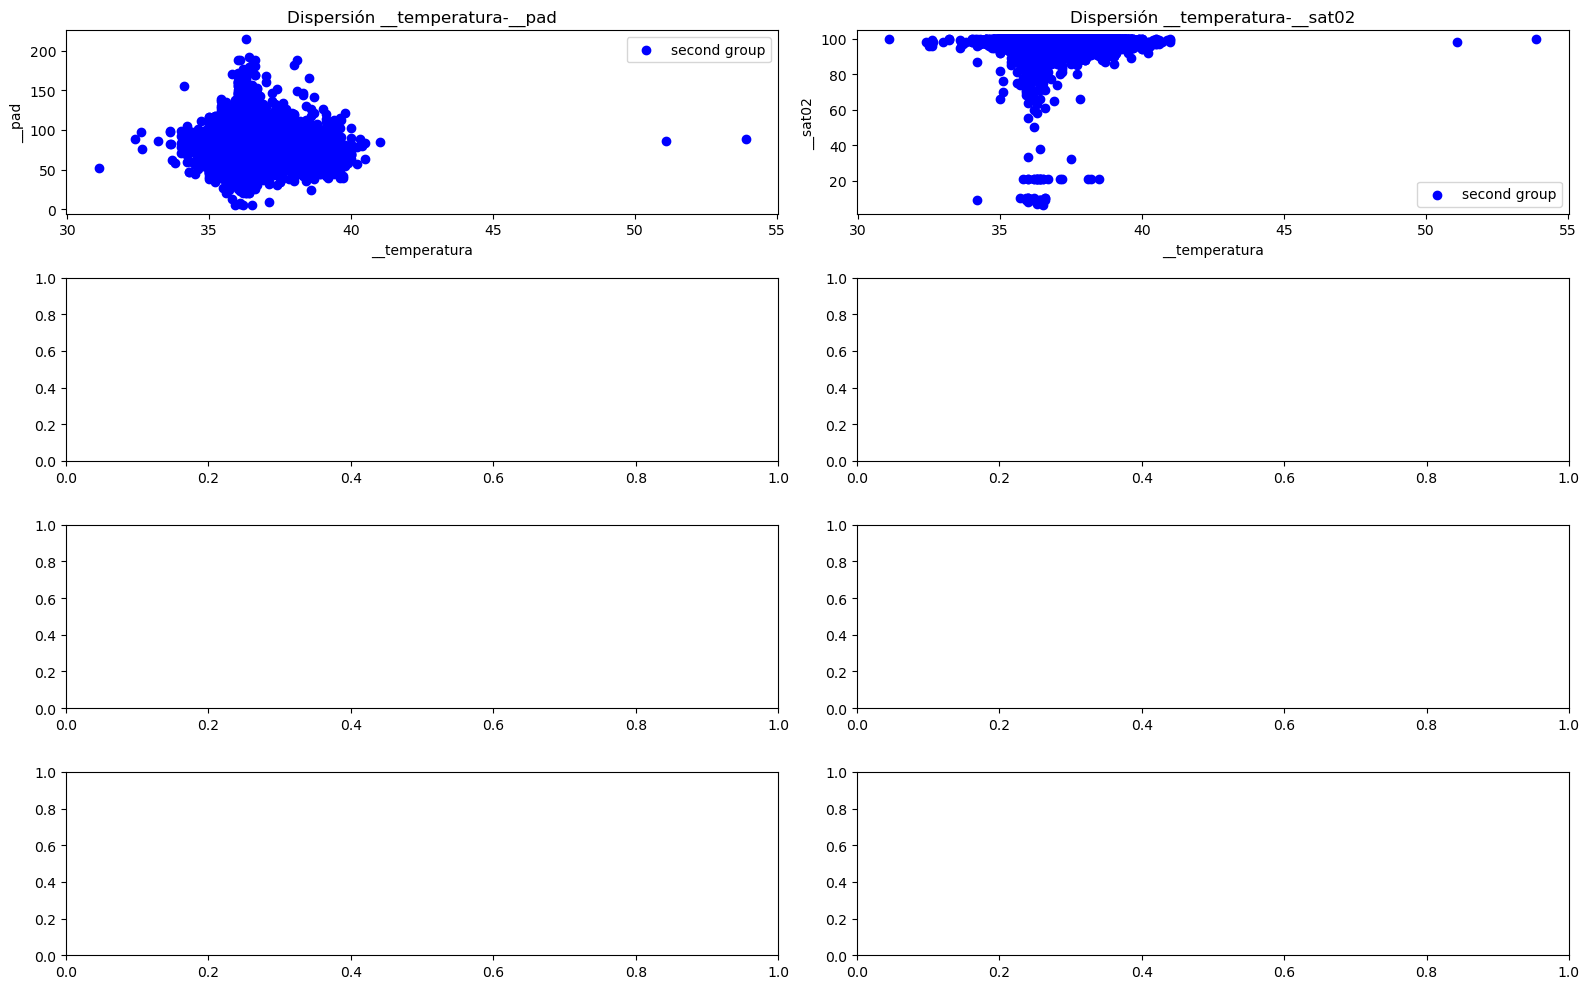

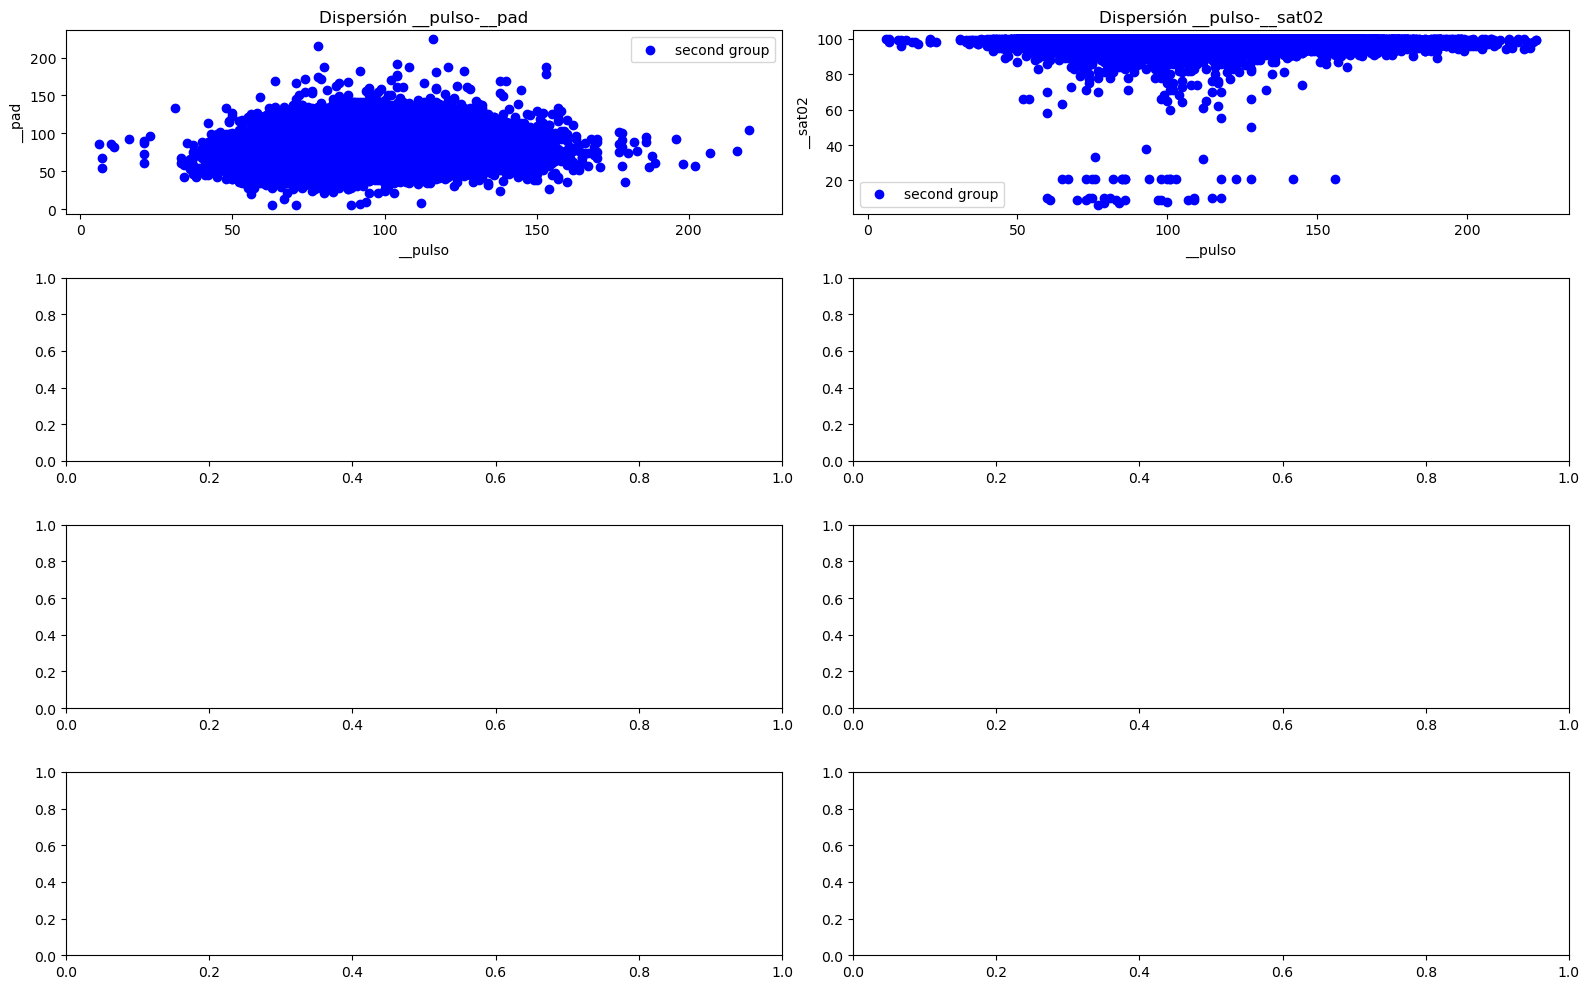

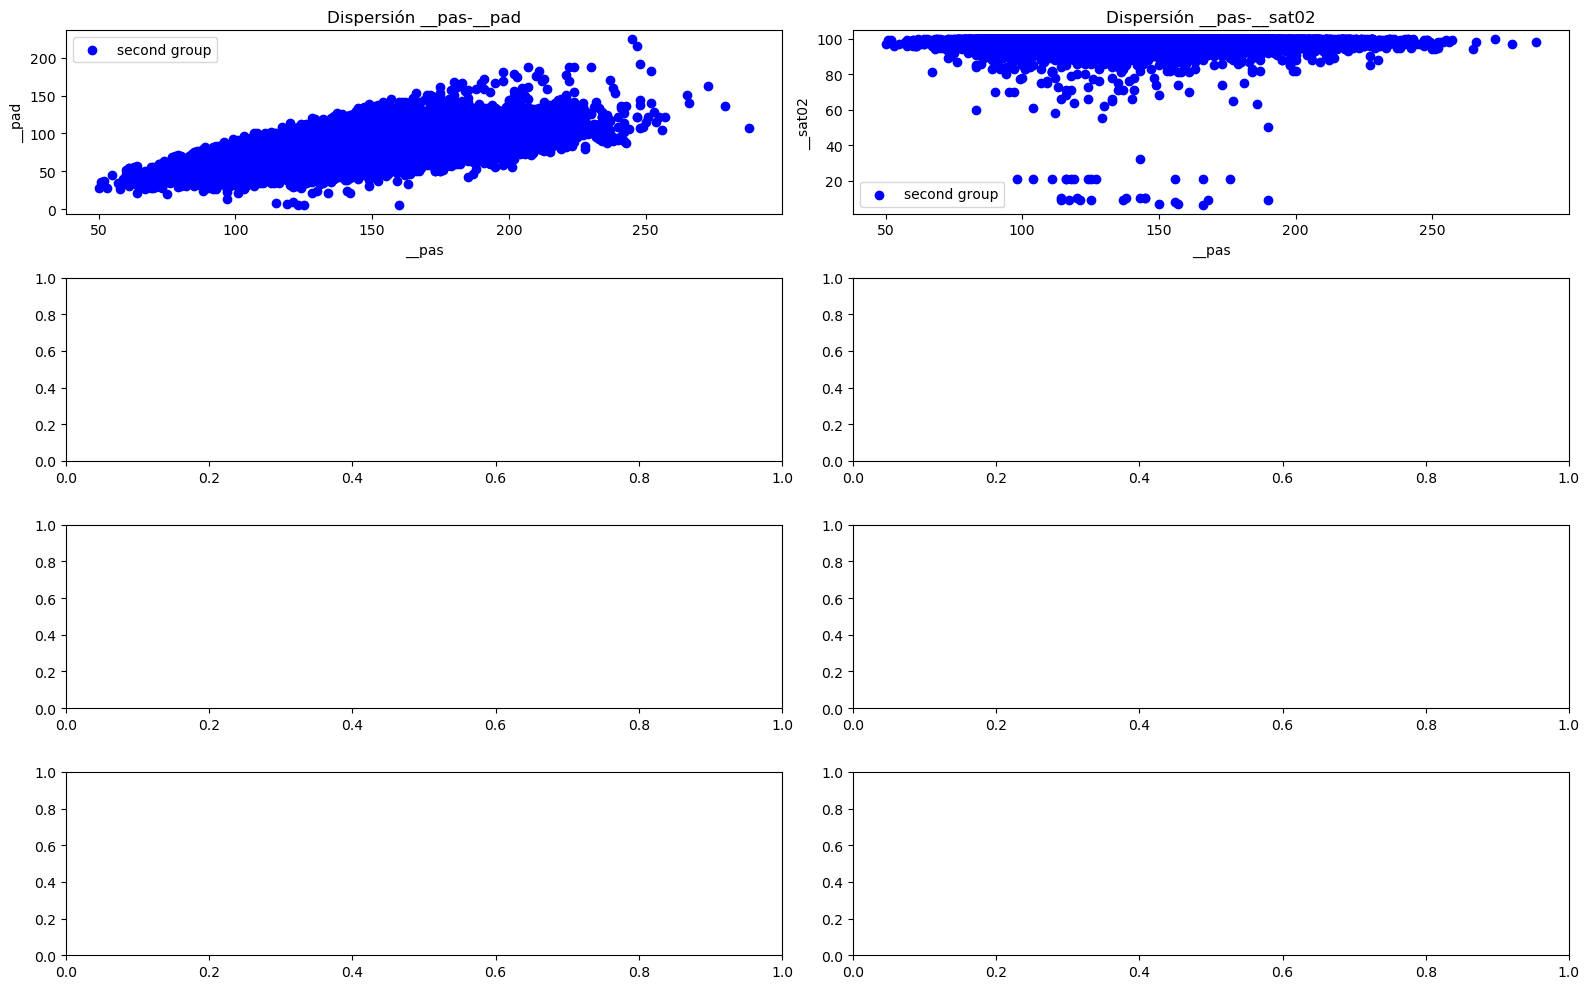

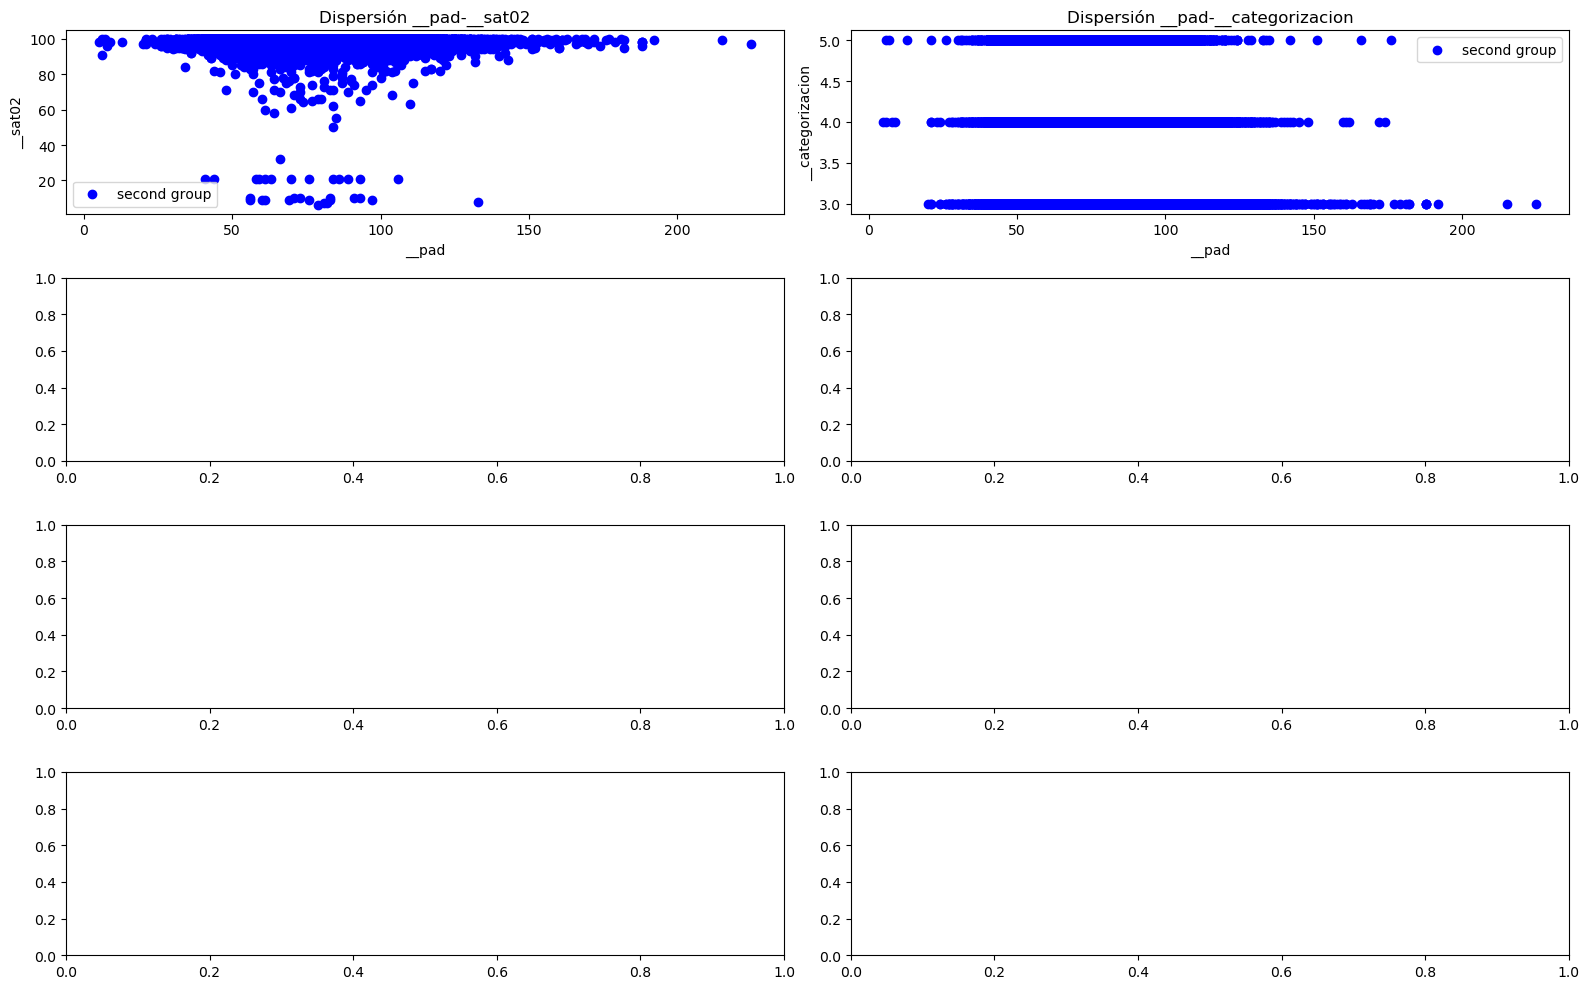

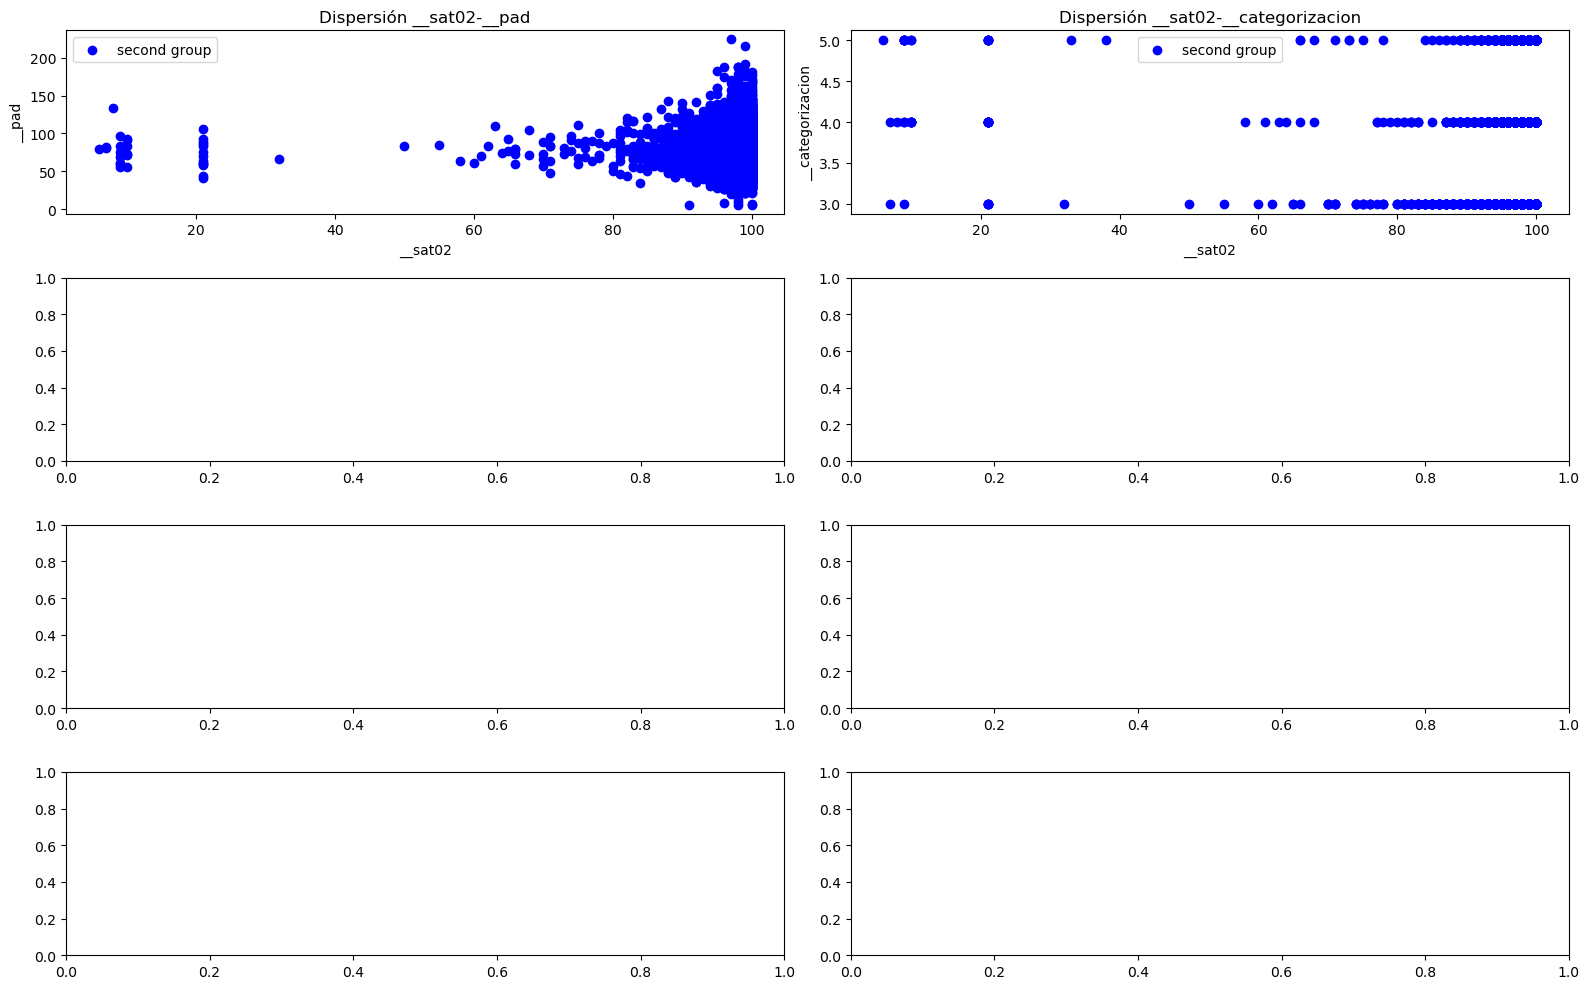

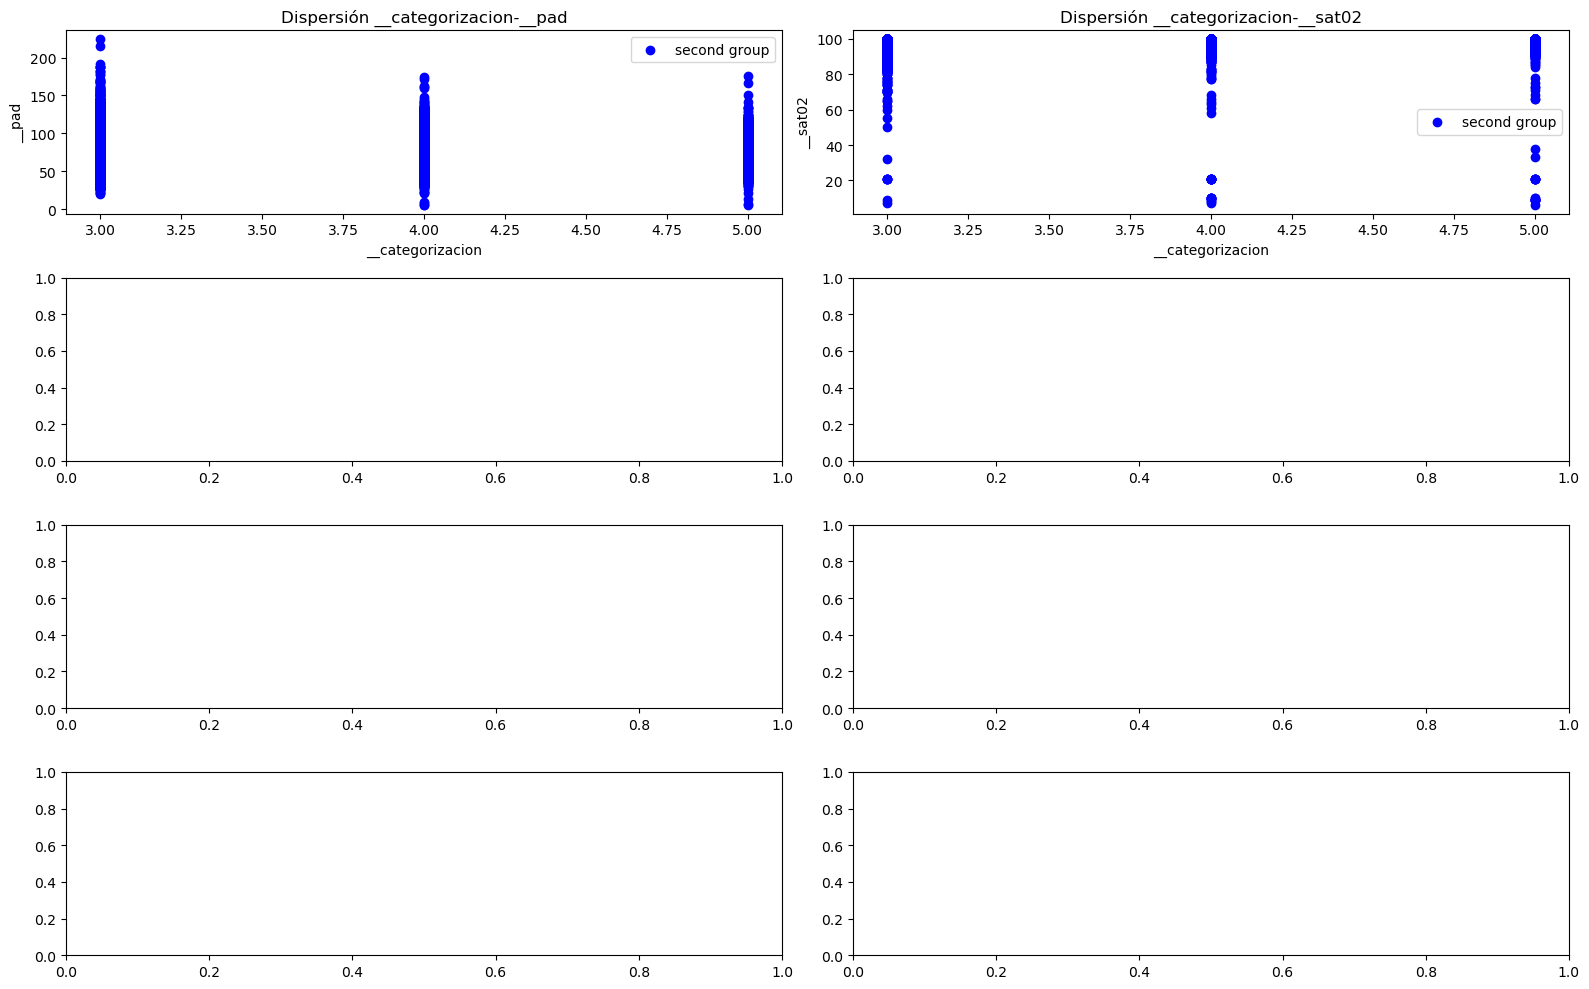

In [8]:
for col_name in second_group.columns[0:8]:
  columna = col_name
  n_columna_j = 5
  i = 0
  fig, axs = plt.subplots(4, 2, figsize=(16,10))
  while(i < 1):
    j = 0
    while(j < 2):
      col_name_j = second_group.columns[n_columna_j]
      if columna != col_name_j:

        #axs[i, j].scatter(list(first_group[columna]),list(first_group[col_name_j]), marker='o', color = "red", label = 'first group')
        axs[i, j].scatter(second_group[columna],second_group[col_name_j], marker='o', color = "blue", label = 'second group')

        axs[i, j].set_title("Dispersión " + columna + "-" + col_name_j)
        axs[i, j].set_xlabel(columna)
        axs[i, j].set_ylabel(col_name_j)
        axs[i, j].legend()

        j = j + 1

      n_columna_j = n_columna_j + 1

    i = i + 1

  fig.tight_layout()
  plt.show()

In [9]:
# Extrae la columna de categorización
df_output = second_group['__categorizacion'].copy()
df_cleaned = second_group.drop(['__categorizacion'],axis=1)

print(df_output)
print(df_cleaned)

77028    3
42149    3
77204    3
79438    3
44025    3
        ..
69053    5
69054    5
33805    5
69086    5
76005    5
Name: __categorizacion, Length: 96560, dtype: int64
       month  __sexo  __temperatura  __pulso  __pas  __pad  __sat02
77028      8       0      39.299999    223.0    NaN    NaN     99.0
42149     10       0      38.700001    116.0  121.0   80.0     99.0
77204     11       1      37.900002    144.0    NaN    NaN     99.0
79438     11       0      36.000000     67.0  134.0   55.0     98.0
44025      4       1      35.400002    104.0  132.0   90.0     96.0
...      ...     ...            ...      ...    ...    ...      ...
69053      3       0      36.000000    110.0    NaN    NaN     98.0
69054      5       0      36.200001    135.0    NaN    NaN     99.0
33805      5       1      36.500000     83.0  125.0   79.0     99.0
69086      7       1      36.500000    129.0    NaN    NaN     99.0
76005     10       1      36.599998    114.0    NaN    NaN     96.0

[96560 row

In [10]:
# Paso 3: Manejar los valores faltantes
# Rellenar valores numéricos faltantes con la media de la columna
for column in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    df_cleaned[column].fillna(df_cleaned[column].mean(), inplace=True)

print(df_cleaned)

       month  __sexo  __temperatura  __pulso       __pas      __pad  __sat02
77028      8       0      39.299999    223.0  131.510299  77.403186     99.0
42149     10       0      38.700001    116.0  121.000000  80.000000     99.0
77204     11       1      37.900002    144.0  131.510299  77.403186     99.0
79438     11       0      36.000000     67.0  134.000000  55.000000     98.0
44025      4       1      35.400002    104.0  132.000000  90.000000     96.0
...      ...     ...            ...      ...         ...        ...      ...
69053      3       0      36.000000    110.0  131.510299  77.403186     98.0
69054      5       0      36.200001    135.0  131.510299  77.403186     99.0
33805      5       1      36.500000     83.0  125.000000  79.000000     99.0
69086      7       1      36.500000    129.0  131.510299  77.403186     99.0
76005     10       1      36.599998    114.0  131.510299  77.403186     96.0

[96560 rows x 7 columns]


In [11]:
# Paso 4: Escalar los datos para que tengan una media de 0 y una desviación estándar de 1
scaler = StandardScaler()
#numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
colums_to_scale = df_cleaned[['__temperatura','__pulso','__pas','__pad','__sat02']].columns
#df_cleaned[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])
df_cleaned[colums_to_scale] = scaler.fit_transform(df_cleaned[colums_to_scale])

print(df_cleaned)

       month  __sexo  __temperatura   __pulso     __pas         __pad  \
77028      8       0       5.120269  5.698469  0.000000 -1.058016e-15   
42149     10       0       4.062909  0.987120 -0.530651  1.933360e-01   
77204     11       1       2.653093  2.219996  0.000000 -1.058016e-15   
79438     11       0      -0.695229 -1.170415  0.125702 -1.667945e+00   
44025      4       1      -1.752589  0.458744  0.024724  9.378482e-01   
...      ...     ...            ...       ...       ...           ...   
69053      3       0      -0.695229  0.722932  0.000000 -1.058016e-15   
69054      5       0      -0.342772  1.823714  0.000000 -1.058016e-15   
33805      5       1       0.185908 -0.465914 -0.328696  1.188847e-01   
69086      7       1       0.185908  1.559526  0.000000 -1.058016e-15   
76005     10       1       0.362131  0.899057  0.000000 -1.058016e-15   

        __sat02  
77028  0.266967  
42149  0.266967  
77204  0.266967  
79438 -0.147291  
44025 -0.975808  
...         ...

In [12]:
# Exportar el DataFrame resultante a un archivo CSV
df_cleaned['__categorizacion'] = df_output
output_file_path = 'databases/Base de datos HACQ 2(preprocesada).csv'
df_cleaned.to_csv(output_file_path, index=False)

print(f"El archivo preprocesado se ha guardado en {output_file_path}")

El archivo preprocesado se ha guardado en databases/Base de datos HACQ 2(preprocesada).csv


ENTRENAMIENTO Y EVALUACIÓN

In [13]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping

2024-07-30 12:20:11.549368: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-30 12:20:16.449462: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-30 12:20:16.457546: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-30 12:20:26.145403: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [14]:
#1 Cargar los datos preprocesados
file_path = 'databases/Base de datos HACQ 2(preprocesada).csv'
df = pd.read_csv(file_path)

In [15]:
#2 Separar las características de entrada y de salida (objetivo)
input = df.drop(columns=['__categorizacion'])
output = df['__categorizacion']

print(input)
print(output)

       month  __sexo  __temperatura   __pulso     __pas         __pad  \
0          8       0       5.120269  5.698469  0.000000 -1.058016e-15   
1         10       0       4.062909  0.987120 -0.530651  1.933360e-01   
2         11       1       2.653093  2.219996  0.000000 -1.058016e-15   
3         11       0      -0.695229 -1.170415  0.125702 -1.667945e+00   
4          4       1      -1.752589  0.458744  0.024724  9.378482e-01   
...      ...     ...            ...       ...       ...           ...   
96555      3       0      -0.695229  0.722932  0.000000 -1.058016e-15   
96556      5       0      -0.342772  1.823714  0.000000 -1.058016e-15   
96557      5       1       0.185908 -0.465914 -0.328696  1.188847e-01   
96558      7       1       0.185908  1.559526  0.000000 -1.058016e-15   
96559     10       1       0.362131  0.899057  0.000000 -1.058016e-15   

        __sat02  
0      0.266967  
1      0.266967  
2      0.266967  
3     -0.147291  
4     -0.975808  
...         ...

In [16]:
# Convertir la salida a categorías
output = to_categorical(output)
print(output)

[[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


In [17]:
#3 Dividir los datos en conjuntos de entrenamiento 80% y prueba 20% 
input_train, input_test, output_train, output_test = train_test_split(input, output, test_size=0.2, random_state=42)

In [18]:
#4 Construir el modelo dela red neuronal (Perceptron multicapa)
def MLP_NN():
    NumNeurons = 7
    model = Sequential()
    model.add(Dense(64, input_dim=input_train.shape[1]))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.5))
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.5))
    model.add(Dense(output.shape[1], activation='softmax'))  # Usar 'softmax' para clasificación multiclase

    #opt =  keras.optimizers.Adam(learning_rate=0.001)

    # Compilar el modelo
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [19]:
#5 Entrenar el modelo
n_epochs = 500
#network = MLP_NN()
#train = network.fit(input_train, output_train, epochs=n_epochs, batch_size=32, validation_split=0.2)


network = MLP_NN()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
train = network.fit(input_train, output_train, epochs=n_epochs, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


2024-07-30 12:24:00.316190: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-30 12:24:00.318111: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/500
1932/1932 [==============================] - 5s 1ms/step - loss: 1.0773 - accuracy: 0.4542 - val_loss: 0.9723 - val_accuracy: 0.5070
Epoch 2/500
1932/1932 [==============================] - 2s 1ms/step - loss: 0.9879 - accuracy: 0.4892 - val_loss: 0.9623 - val_accuracy: 0.5080
Epoch 3/500
1932/1932 [==============================] - 3s 1ms/step - loss: 0.9765 - accuracy: 0.5025 - val_loss: 0.9571 - val_accuracy: 0.5175
Epoch 4/500
1932/1932 [==============================] - 2s 1ms/step - loss: 0.9715 - accuracy: 0.5042 - val_loss: 0.9541 - val_accuracy: 0.5154
Epoch 5/500
1932/1932 [==============================] - 2s 1ms/step - loss: 0.9676 - accuracy: 0.5092 - val_loss: 0.9513 - val_accuracy: 0.5183
Epoch 6/500
1932/1932 [==============================] - 2s 1ms/step - loss: 0.9650 - accuracy: 0.5100 - val_loss: 0.9531 - val_accuracy: 0.5195
Epoch 7/500
1932/1932 [==============================] - 2s 1ms/step - loss: 0.9641 - accuracy: 0.5137 - val_loss: 0.9465 - val_ac

In [20]:
#6 Evaluar el modelo
loss, accuracy = network.evaluate(input_test, output_test)
print(f"Precisión en el conjunto de prueba: {accuracy:.2f}")

604/604 [==============================] - 1s 880us/step - loss: 0.9382 - accuracy: 0.5309
Precisión en el conjunto de prueba: 0.53


In [21]:
#7 Predicciones
output_pred = network.predict(input_test)
print(output_pred)
output_pred_classes = np.argmax(output_pred, axis=1)
print(output_pred_classes)
output_test_classes = np.argmax(output_test, axis=1)
print(output_test_classes)

604/604 [==============================] - 0s 696us/step
[[1.6095763e-08 3.6580566e-08 1.9701766e-08 2.0418519e-01 4.8373720e-01
  3.1207746e-01]
 [4.0346396e-07 7.9864697e-07 4.2015120e-07 1.6147746e-01 4.0288040e-01
  4.3564042e-01]
 [1.2887585e-06 1.9751892e-06 1.0127280e-06 1.4595571e-01 4.4125929e-01
  4.1278073e-01]
 ...
 [2.5830857e-07 5.0701078e-07 1.7939480e-07 1.8074702e-01 4.7353444e-01
  3.4571764e-01]
 [8.1868529e-10 2.9726483e-09 1.0086667e-09 2.2533306e-01 4.8127511e-01
  2.9339179e-01]
 [1.3263514e-06 2.3193363e-06 9.5679934e-07 1.2356268e-01 3.8610464e-01
  4.9032813e-01]]
[4 5 4 ... 4 4 5]
[4 4 5 ... 3 5 5]


In [22]:
#8 Generar el reporte de clasificación
print(classification_report(output_test_classes, output_pred_classes))

              precision    recall  f1-score   support

           3       0.76      0.25      0.38      3763
           4       0.51      0.50      0.51      8089
           5       0.52      0.71      0.60      7460

    accuracy                           0.53     19312
   macro avg       0.60      0.49      0.49     19312
weighted avg       0.56      0.53      0.52     19312



In [23]:
#9 Matriz de confusión
print(confusion_matrix(output_test_classes, output_pred_classes))

[[ 942 1653 1168]
 [ 286 4019 3784]
 [  15 2154 5291]]


In [24]:
# Matriz de confusión con datos de entrenamiento
output_train_pred = network.predict(input_train)
output_train_pred_classes = np.argmax(output_train_pred, axis=1)
output_train_classes = np.argmax(output_train, axis=1)
print(confusion_matrix(output_train_classes, output_train_pred_classes))

2414/2414 [==============================] - 2s 774us/step
[[ 3729  6627  4939]
 [ 1109 15874 15026]
 [   50  8510 21384]]
